# TD-TME11: résolution de problèmes - jeu à 2 joueurs

L'objectif de ce TP est d'implémenter des algorithmes de résolution de problèmes pour réaliser une IA capable de jouer à des jeux à 2 joueurs.

Dans ce TP, on ne va pas se consacrer à un jeu en particulier mais implémenter des fonctions de bases pour la conception d'un joueur artificiel.

## Etape 0: Evaluation de l'UE !

Avant de commencer, prenez quelques minutes pour remplir l'évaluation de l'UE !

Vous avez dù recevoir un mail sur votre compte @etu.upmc.fr avec les liens vers les questionnaires pour les UE que vous avez suivies, pensez à y répondre !


## Etape 1: Arbres des coups et évaluations

Afin de simuler le comportement d'un jeu à 2 joueurs, on utilise la représentation suivante: les positions sont dénommées par un label (une chaîne de caractères). Une position peut être évaluée soit parce qu'elle est terminale pour le jeu, soit parce que l'on a appliqué une fonction d'évaluation. Dans ce cas, elle est associée à une valeur numérique entière comprise entre $-1024$ (position gagnante pour le joueur $j1$) et $+1024$ (position gagnante pour le joueur $j2$).

En Python, un arbre de recherche est représenté par un dictionnaire:
- la clé du dictionnaire est le label de la position
- la valeur associée est une liste contenant les positions atteignables en un coup:
    - soit sous forme de label, soit sous forme de valeur numérique (si la position atteignable a été évaluée)

Par exemple, l'arbre donné en cours est représenté par le dictionnaire:

In [1]:
arbre_cours = dict()
arbre_cours['A']= ['B', 'C', 'D']
arbre_cours['B']= ['E', 'F']
arbre_cours['C']= ['G', 'H']
arbre_cours['D']= ['I', 'J']
arbre_cours['E']= [7, 12]
arbre_cours['F']= [14, 16]
arbre_cours['G']= [6, 5]
arbre_cours['H']= [3, 4]
arbre_cours['I']= [10, 8]
arbre_cours['J']= [7, 1]

arbre_cours

{'A': ['B', 'C', 'D'],
 'B': ['E', 'F'],
 'C': ['G', 'H'],
 'D': ['I', 'J'],
 'E': [7, 12],
 'F': [14, 16],
 'G': [6, 5],
 'H': [3, 4],
 'I': [10, 8],
 'J': [7, 1]}

In [2]:
arbre_cours

{'A': ['B', 'C', 'D'],
 'B': ['E', 'F'],
 'C': ['G', 'H'],
 'D': ['I', 'J'],
 'E': [7, 12],
 'F': [14, 16],
 'G': [6, 5],
 'H': [3, 4],
 'I': [10, 8],
 'J': [7, 1]}

On rappelle qu'il est facile de connaître le type d'une variable grâce à la fonction Python *type*:

In [3]:
label= 'A'
if type(label) == str:
    print('le label est une chaîne')
elif type(label) == int:
    print('le label est un entier')
else:
    print ('type de label inconnu')

le label est une chaîne


### Classe pour représenter un arbre

In [4]:
# - - Fonctions utiles:
def estFeuille(label):
    """ label: chaîne ou entier
        rend True si label est un entier
    """
    return type(label) == int

def autreCamp(camp):
    """ camp: soit 'MIN', soit 'MAX'
        rend l'autre camp
    """
    if camp == 'MIN':
        return 'MAX'
    return 'MIN'

# - - Classe pour représenter un arbre de recherche
class ArbreCoups:
    def __init__(self,dico,racine,joueur):
        """ dico: dictionnaire donnant l'arbre de recherche simulé
            racine: position de départ (racine de l'arbre)
            joueur: joueur qui doit jouer dans la position racine: soit 'MIN' soit 'MAX'
        """
        self.arbre = dico
        self.racine = racine
        self.joueur = joueur
    def getDico (self) :
        return self.arbre
    def donnePositionsFilles(self,label):
        """ label: chaîne ou entier
            rend la liste des positions filles de la position de label donné
            ou [] si c'est une feuille de l'arbre ou si le label est incorrect
            Hypothèse: on considèrera quand même que le label sera toujours correct.
        """
        if estFeuille(label):
            return []
        return self.arbre[label]
    
    def donneRacine(self):
        """ rend le label de la racine de l'arbre
        """
        return self.racine

In [5]:
unArbre = ArbreCoups(arbre_cours,'A', 'MAX')
unArbre.arbre

{'A': ['B', 'C', 'D'],
 'B': ['E', 'F'],
 'C': ['G', 'H'],
 'D': ['I', 'J'],
 'E': [7, 12],
 'F': [14, 16],
 'G': [6, 5],
 'H': [3, 4],
 'I': [10, 8],
 'J': [7, 1]}

In [6]:
unArbre.donnePositionsFilles('A')

['B', 'C', 'D']

In [7]:
unArbre.donnePositionsFilles('E')

[7, 12]

**[Q]** Ecrire la fonction *afficheArbre* qui prend un *ArbreCoups* en argument est l'affiche joliement.

Il pourra être intéressant d'utiliser la représentation par *deque* de la classe *collections* vu à la séance précédente.

In [8]:
from collections import deque
HMAX = 100
def afficheArbre ( un_Arbre ) :
    # Déclaration
    pile = deque()
    racine = un_Arbre.donneRacine()
    pile.append((racine,0))
    cpt = 0
    while cpt <= HMAX and len(pile) > 0 :
        label,niv = pile.pop()
        if niv == 0 :
            print label 
        else :
            print "  |  "*(niv-1)," |---",label
        fils = un_Arbre.donnePositionsFilles(label)
        for i in fils :
            pile.append((i,niv+1))
        

In [9]:
afficheArbre(unArbre)

A
  |--- D
  |    |--- J
  |    |    |--- 1
  |    |    |--- 7
  |    |--- I
  |    |    |--- 8
  |    |    |--- 10
  |--- C
  |    |--- H
  |    |    |--- 4
  |    |    |--- 3
  |    |--- G
  |    |    |--- 5
  |    |    |--- 6
  |--- B
  |    |--- F
  |    |    |--- 16
  |    |    |--- 14
  |    |--- E
  |    |    |--- 12
  |    |    |--- 7


In [10]:
unArbre.donneRacine() 

'A'

In [11]:
afficheArbre(unArbre)

A
  |--- D
  |    |--- J
  |    |    |--- 1
  |    |    |--- 7
  |    |--- I
  |    |    |--- 8
  |    |    |--- 10
  |--- C
  |    |--- H
  |    |    |--- 4
  |    |    |--- 3
  |    |--- G
  |    |    |--- 5
  |    |    |--- 6
  |--- B
  |    |--- F
  |    |    |--- 16
  |    |    |--- 14
  |    |--- E
  |    |    |--- 12
  |    |    |--- 7


## Etape 2: algorithme minimax

En considérant que l'arbre des coups est celui représenté dans la partie précédente, on souhaite maintenant écrire la fonction *minimax* qui parcourt l'arbre et rend le meilleur coup à jouer à la racine de l'arbre, ainsi que son évaluation.

L'écriture de cette fonction va être un peu particulière: on utilise un *ArbreCoups* en argument mais celui-ci ne sera jamais modifié, il ne sert qu'à connaître les coups à jouer.
Pour la programmation d'un vrai jeu, on n'aurait pas à utiliser une telle structure données.


**[Q]** Ecrire la fonction *minimax* qui prend en argument un *ArbreCoups*, une position de cet arbre et le camp qui doit jouer ('MIN' ou 'MAX') et rend le triplet constitué par l'évaluation de cette position trouvée par l'algorithme minimax, la liste des coups qui mènent à cette évaluation, ainsi que le nombre total d'évaluations réalisées (c'est-à-dire de feuilles vues).

Remarque: dans cette implémentation, on donnera la position à atteindre et non pas le coups.


In [15]:
def minimax(unArbre,pos,camp) :
    nb_feuilles_vues = 0
    liste_coups = []
    if estFeuille (pos) :
        return pos, [], nb_feuilles_vues + 1
    fils = unArbre.donnePositionsFilles(pos)
    newCamp = autreCamp(camp)
    if camp == "MAX" :
        best_val = -1024
    else :
        best_val = 1024
    for i in fils :
        a,b,c = minimax(unArbre,i,newCamp)
        nb_feuilles_vues = nb_feuilles_vues + c 
        if (camp == 'MAX') :
            if(a > best_val) :
                best_val = a 
                liste_coups=[i]+b
        else :
            if(a < best_val) :
                best_val = a 
                liste_coups=[i]+b

    return best_val,liste_coups,nb_feuilles_vues

In [19]:
evaluation, liste_coups, nb_feuilles_vues = minimax(unArbre,'E','MIN')
print"Evaluation trouvée: ", evaluation 
print"Chemin trouvé: ", liste_coups
print"Nombre de feuilles vues: ", nb_feuilles_vues

Evaluation trouvée:  7
Chemin trouvé:  [7]
Nombre de feuilles vues:  2


## Etape 3: algorithme alpha-béta

**[Q]** Ecrire la fonction *alphabeta* qui prend en argument un *ArbreCoups*, une position de cet arbre, le camp qui doit jouer ('MIN' ou 'MAX') et les valeurs alpha et béta; et rend le triplet constitué par l'évaluation de cette position trouvée par l'algorithme minimax, la liste des coups qui mènent à cette évaluation, ainsi que le nombre total d'évaluations réalisées (c'est-à-dire de feuilles vues).

La fonction affichera aussi les coupes réalisées (voir l'exemple d'éxécution plus bas).

In [53]:
def alphabeta(unArbre,pos,camp,mini,maxi) :
    nb_feuilles_vues = 0
    liste_coups = []
    if estFeuille (pos) :
        return pos, [], nb_feuilles_vues + 1
    fils = unArbre.donnePositionsFilles(pos)
    newCamp = autreCamp(camp)
    if camp == "MAX" :
        best_val = -1024
    else :
        best_val = 1024
    alpha = mini
    beta = maxi 
    for i in fils :
        a,b,c = alphabeta(unArbre,i,newCamp,alpha,beta)
        nb_feuilles_vues = nb_feuilles_vues + c 
        if (camp == 'MAX') :
            if(a > beta) :
                best_val = beta
                print "Coupe beta apres le fils ",i ," de ", pos
                return best_val,liste_coups,nb_feuilles_vues
            else :
                alpha = max ([alpha,a]) 
                if (a > best_val) :
                    best_val = a
                    liste_coups=[i]+b
        else :
            if(a < alpha) :
                best_val = alpha 
                print "Coupe alpha apres le fils ", i , " de " , pos
                return best_val,liste_coups,nb_feuilles_vues
            else :
                beta = min ([beta,a]) 
                if (a < best_val) :
                    best_val = a
                    liste_coups=[i]+b
    return best_val,liste_coups,nb_feuilles_vues

In [57]:
evaluation, liste_coups, nb_feuilles_vues = alphabeta(unArbre,'A','MIN',-1024,1024)
print "Evaluation trouvee: ", evaluation
print "Chemin trouve: ", liste_coups
print "Nombre de feuilles vues: ", nb_feuilles_vues

Coupe alpha apres le fils  3  de  H
Coupe beta apres le fils  I  de  D
Evaluation trouvee:  5
Chemin trouve:  ['C', 'G', 5]
Nombre de feuilles vues:  9


In [ ]:
coupe beta aprés le fils  14  de  F
coupe alpha après le fils  G  de  C
coupe alpha après le fils  I  de  D
Evaluation trouvée:  12
Chemin trouvé:  ['B', 'E', 12]
Nombre de feuilles vues:  7


## Expérimentations

### Importance de l'ordre d'examen des coups

L'ordre dans lequel l'algorithme alpha-béta examine les feuilles de l'arbre est très important et influence grandement le nombre de coupes réalisées.

Par exemple, soit l'arbre suivant:

In [58]:
arbre_v2 = dict()
arbre_v2['A']= ['B', 'C', 'D']
arbre_v2['B']= ['E', 'F']
arbre_v2['C']= ['G', 'H']
arbre_v2['D']= ['I', 'J']
arbre_v2['E']= [0, 1]
arbre_v2['F']= [2, 3, 4]
arbre_v2['G']= [5, 6, 7]
arbre_v2['H']= [8, 9]
arbre_v2['I']= [10, 11]
arbre_v2['J']= [12, 13, 14, 15]

arbre2 = ArbreCoups(arbre_v2,'A', 'MAX')

Le résultat de l'algorithme minimax est le suivant, après l'examen de l'ensemble des 16 feuilles:

In [60]:
evaluation, liste_coups, nb_feuilles_vues = minimax(arbre2,'A','MAX')
print"Evaluation trouvée: ", evaluation
print"Chemin trouvé: ", liste_coups
print"Nombre de feuilles vues: ", nb_feuilles_vues

Evaluation trouvée:  11
Chemin trouvé:  ['D', 'I', 11]
Nombre de feuilles vues:  16


Et l'algorithme alphabéta produit une série de 3 coupes amenant à l'examen de 10 feuilles seulement:

In [62]:
evaluation, liste_coups, nb_feuilles_vues =  alphabeta(arbre2,'A', 'MAX',-1024,1024)
print"Evaluation trouvée: ", evaluation
print"Chemin trouvé: ", liste_coups
print"Nombre de feuilles vues: ", nb_feuilles_vues

Coupe beta apres le fils  2  de  F
Coupe beta apres le fils  8  de  H
Coupe beta apres le fils  12  de  J
Evaluation trouvée:  11
Chemin trouvé:  ['D', 'I', 11]
Nombre de feuilles vues:  10


Il est pourtant possible de trouver un ordre d'examen des feuilles qui ne produit qu'un examen de 7 feuilles seulement.

**[Q]** Donner l'expression du dictionnaire *arbre_v3* qui est obtenu en réarrangeant les noeuds de l'arbre précédent. 
Attention: l'arbre doit conserver la même structure, c'est seulement les sous-arbres qui doivent être réordonnés.
Par exemple: il est possible de changer

    ['B', 'C', 'D']
    
en

    ['C', 'D', 'B']
    
ou tout autre modification de ce type.


In [31]:
# On construit un arbre coup avec le dictionnaire arbre_v3:
arbre3 = ArbreCoups(arbre_v3,'A', 'MAX')

Au final, on doit donc obtenir;

In [18]:
# l'arbre est identique, le résultat du minimax est le même.
evaluation, liste_coups, nb_feuilles_vues = minimax(arbre3,'A','MAX')
print("Evaluation trouvée: ", evaluation)
print("Chemin trouvé: ", liste_coups)
print("Nombre de feuilles vues: ", nb_feuilles_vues)

Evaluation trouvée:  11
Chemin trouvé:  ['D', 'I', 11]
Nombre de feuilles vues:  16


In [19]:
evaluation, liste_coups, nb_feuilles_vues =  alphabeta(arbre3,'A', 'MAX',-1024,1024)
print("Evaluation trouvée: ", evaluation)
print("Chemin trouvé: ", liste_coups)
print("Nombre de feuilles vues: ", nb_feuilles_vues)

coupe beta aprés le fils  12  de  J
coupe alpha après le fils  H  de  C
coupe alpha après le fils  E  de  B
Evaluation trouvée:  11
Chemin trouvé:  ['D', 'I', 11]
Nombre de feuilles vues:  7


### Test sur un arbre plus grand

Utiliser l'arbre suivant pour tester vos fonctions:

In [20]:
arbre_autre = dict()
arbre_autre['A']= ['B', 'C', 'D', 'E']
arbre_autre['B']= ['F', 'G', 'H']
arbre_autre['C']= ['I', 'J']
arbre_autre['D']= ['K', 'L', 'M']
arbre_autre['E']= ['N', 'P']
arbre_autre['F']= ['Q', 'R', 7]
arbre_autre['G']= ['S', 7, 8, 12]
arbre_autre['H']= ['T', 9, 4, 13]
arbre_autre['I']= ['U', 'V', 6]
arbre_autre['J']= ['O', 11, 5]
arbre_autre['K']= ['W', 9, 0]
arbre_autre['L']= [8, 2, 2, 14]
arbre_autre['M']= ['X', 5]
arbre_autre['N']= ['Y', 'Z']
arbre_autre['O']= [2, 10, 4]
arbre_autre['P']= [15, 12, 9, 13]
arbre_autre['Q']= [3, 7, 17, 5]
arbre_autre['R']= [3, 8, 7]
arbre_autre['S']= [14, 4, 11, 7]
arbre_autre['T']= [2, 6]
arbre_autre['U']= [11, 10, 8]
arbre_autre['V']= [7, 12, 5]
arbre_autre['W']= [0, 1, 7, 2]
arbre_autre['X']= [4, 12, 3]
arbre_autre['Y']= [10, 11, 8]
arbre_autre['Z']= [14, 4, 15, 3]

autreArbre = ArbreCoups(arbre_autre,'A', 'MAX')

**[Q]** Exécuter les algorithmes minimax et alphabéta sur cet arbre.

**[Q]** Trouver un réarrangement de l'ordre d'examen des feuilles de l'arbre qui permette de réduire le nombre de feuilles visitées.

### Un autre arbre

Soit l'arbre suivant, dont la racine est la position A:

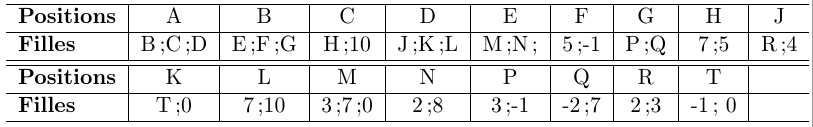

**[Q]** Donner les expressions Python qui permettent de représenter cet arbre.

**[Q]** Appliquer les algorithmes minimax et alphabéta sur cet arbre.

**[Q]** Que se passe-t-il si on lance l'algorithme alphabéta sur cet arbre en prenant comme valeurs initiales $\alpha=5$ et $\beta=9$.
Expliquer ce qui se produit.

**[Q]** Sans exécuter votre fonction, que se passerait-t-il si on lançait l'algorithme alphabéta sur cet arbre en prenant comme valeurs initiales $\alpha=8$ et $\beta=9$?
Vérifier avec votre fonction que vous avez bien envisagé ce qui se produit.